In [41]:
# a. Import the necessary packages

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [42]:
# b. Load the training & testing data

train_path = "dataset/CIFR(Ass2&3)/train_data.csv"
test_path  = "dataset/CIFR(Ass2&3)/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


# Flattened image dimension
input_dim = 32 * 32 * 3

Train shape: (50000, 3073)
Test shape: (10000, 3073)


In [43]:
# c. Define the Feedforward Network (MLP)

model = models.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# d. Train the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.3127 - loss: 1.9045 - val_accuracy: 0.3694 - val_loss: 1.7608
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.3938 - loss: 1.6847 - val_accuracy: 0.4124 - val_loss: 1.6619
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.4285 - loss: 1.5955 - val_accuracy: 0.4178 - val_loss: 1.6386
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.4513 - loss: 1.5343 - val_accuracy: 0.4338 - val_loss: 1.6107
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4690 - loss: 1.4875 - val_accuracy: 0.4560 - val_loss: 1.5149
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4800 - loss: 1.4503 - val_accuracy: 0.4642 - val_loss: 1.5021
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.4952 - loss: 1.4089 - val_accuracy: 0.4858 - val_loss: 1.4427
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.5060 - loss: 1.3779 - 

In [45]:
# e. Evaluate model

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4793 - loss: 1.4611

Test Accuracy: 0.47929999232292175
Test Loss: 1.4611252546310425


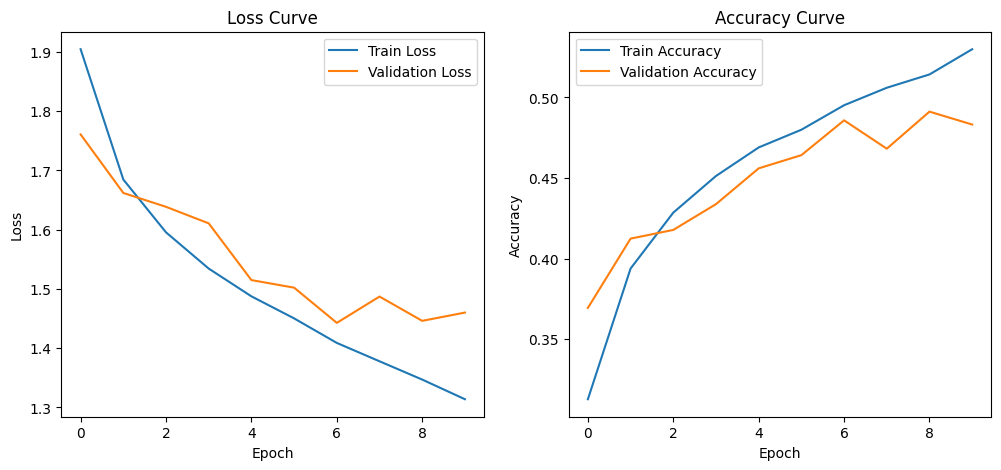

In [46]:
# f. Plot Loss and Accuracy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

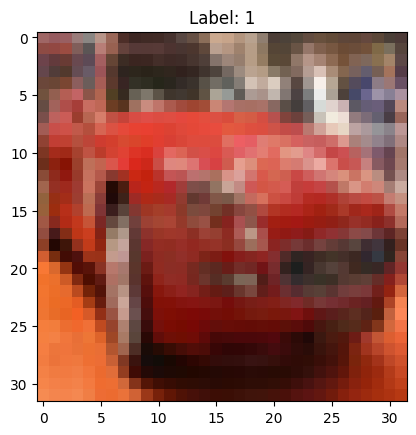

In [47]:
# sample image
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()